# 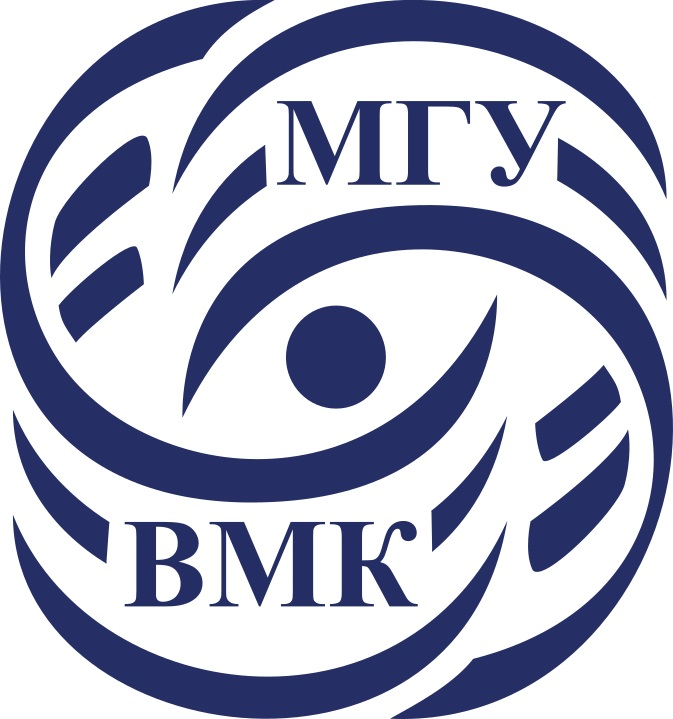

# Машинное обучение. ВМК МГУ


# Практическое задание 5: Линейные модели: регрессия

## Уровень: <font color='SkyBlue'>**Базовый (Base)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2025"></font>







Цель данного задания:

* Узнать, что такое регуляризация, зачем она нужна, и чем отличаются разные регуляризаторы.
* Научиться решать задачу регрессии линейными моделями.
-------

<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 5 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [1]:
! curl https://raw.githubusercontent.com/MSU-ML-COURSE/ML-COURSE-25-26/refs/heads/master/requirements/requirements.txt -o ./requirements_2025_26_for_colab_small.txt
! pip install -q -r ./requirements_2025_26_for_colab_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   360  100   360    0     0    822      0 --:--:-- --:--:-- --:--:--   825



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.8')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2025"></font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что <font color='CornflowerBlue'>**линейная регрессия**</font> — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

Для обучения линейной регрессии, равно как и для обучения остальных простых моделей (линейные модели, решающие деревья, knn и т.д.) отлично подходит библиотека `scikit-learn` (sklearn): в ней очень понятный и простой интерфейс.

Однако для обучения более сложных моделей вроде бустинга и нейронных сетей всё же нужно пользоваться специализированными библиотеками: XGBoost, LightGBM, CatBoost и пр. для градиентного бустинга над деревьями, PyTorch, Tensorflow и пр. для нейронных сетей.

---
Напомним, что линейная регрессия &mdash; это модель вида

$$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Для обучения параметров $w$ решается оптимизационная задача следующего вида:

$$\frac{1}{M} ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots + w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot R(w) \rightarrow \min_{w_1, \dots, w_n, b}$$

Здесь $R(w)$ &mdash; это регуляризация параметров модели, $\alpha$ &mdash; коэффициент регуляризации, задаваемый перед началом обучения.

Для обучения линейной регрессии, нам подойдет реализация из sklearn. В sklearn есть несколько классов, реализующих линейную регрессию. Основные это:

- `LinearRegression` — линейная регрессия без регуляризации $R(w) = 0$ (метод наименьших квадратов)
- `Ridge` — линейная регрессия с оптимизацией MSE и $\ell_2$-регуляризацией $R(w) = \frac{1}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right)$
- `Lasso` — линейная регрессия с оптимизацией MSE и $\ell_1$-регуляризацией $R(w) = |w_1| + \dots + |w_n|$

Также есть SVR, ElasticNet  и пр., но не будем сегодня о них

У моделей из sklearn есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

---

Рассмотрим, модельные данные для задачи регрессии. Пусть $x$ будет обычным числом из равномерного распределения, а $y = 0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$.

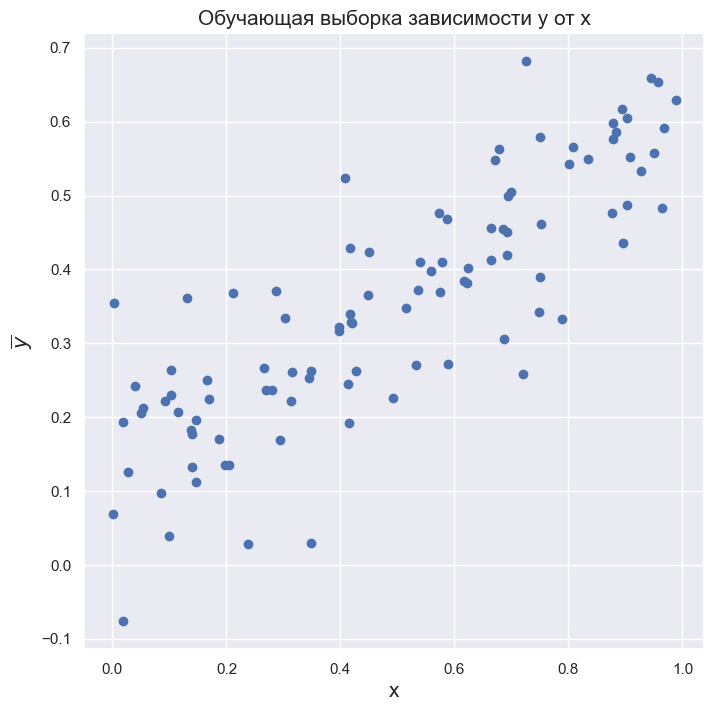

In [4]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

plt.figure(figsize=(8, 8))
plt.scatter(X, Y)
plt.title("Обучающая выборка зависимости y от x", size=15)
plt.xlabel("x", size=15)
plt.ylabel(r'$\overline{y}$', size=15)
plt.show()

<font color='DarkSeaGreen'>**Обучим**</font> линейную регрессию с $l_2$ регуляризацией, и посмотрим как регуляризация влияет на качество модели. В реализации библиотеки `sklearn` (класс Ridge) коэффициент регуляризации задаётся параметром `alpha`

In [5]:
from sklearn.linear_model import Ridge

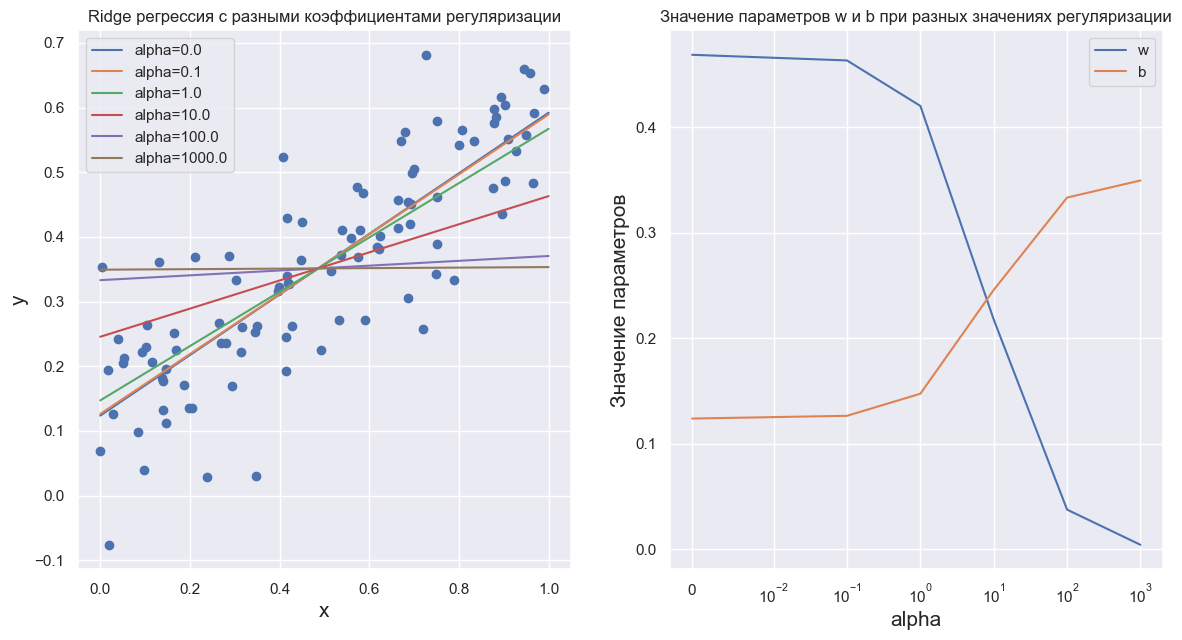

In [6]:
x_axis = np.linspace(0, 1, 200)
fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].scatter(X, Y)

w = []
b = []

alphas = [0.0, 0.1, 1.0, 10.0, 100.0, 1000.0]

for alpha in alphas:
    reg = Ridge(alpha=alpha) # Задаем параметр alpha
    reg.fit(X[:, None], Y)
    pred = reg.predict(x_axis[:, None])
    w.append(reg.coef_[0])
    b.append(reg.intercept_)
    axs[0].plot(x_axis, pred, label="alpha=" + str(alpha))

axs[0].legend()
axs[0].set_xlabel("x", size=15)
axs[0].set_ylabel("y", size=15)
axs[0].set_title("Ridge регрессия с разными коэффициентами регуляризации")
axs[1].plot(alphas, w, label="w")
axs[1].plot(alphas, b, label="b")
axs[1].set_xlabel("alpha", size=15)
axs[1].set_ylabel("Значение параметров", size=15)
axs[1].set_title("Значение параметров w и b при разных значениях регуляризации")
axs[1].set_xscale("symlog", linthresh=0.01)
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 1 [2 баллa]**</font>

Как зависят параметры модели от константы регуляризации? А качество?



<font color='MediumOrchid'>**Ваши выводы тут:**</font>

При увеличении константы регуляризации параметры модели уменьшаются по абсолютной величине. Это происходит потому что регуляризация штрафует большие значения весов. Для Ridge регрессии веса плавно уменьшаются и стремятся к нулю, но никогда его не достигают. В Lasso регрессии некоторые веса могут становиться строго равными нулю, что фактически убирает признаки из модели.

Что касается качества модели - здесь нужен баланс. Если регуляризация слишком слабая (малая константа), модель может переобучиться на обучающей выборке и плохо работать на новых данных. Если регуляризация слишком сильная (большая константа), модель становится слишком простой и недообучается, не улавливая важные закономерности. Оптимальное значение константы регуляризации обычно находится где-то посередине и подбирается с помощью кросс-валидации.

---

Казалось бы, зачем нам <font color='CornflowerBlue'>**регуляризация**</font>?

Давайте рассмотрим ещё один модельный пример. Представим, что кто-то добавил в данные к переменной $x$ её же умноженную на $2$. То есть, теперь у нас два признака $x_1$ и $x_2 = 2 \cdot x_1$. Тогда, $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{4} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. Это может привести к тому, что без регуляризации мы рискуем выучить очень большие веса!

In [7]:
np.random.seed(1)
X2 = np.hstack((X[:, None], 2 * X[:, None]))
Y2 = X2[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X2, Y2)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 0.10062207382659173 	w2: 0.20124414765318352


Коэффициенты адекватные, хотя и не похожи на изначальную зависимость. Но что, если $x_2$ будет равняться $3 \cdot x_1$?

In [8]:
np.random.seed(1)
X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

reg = Ridge(alpha=0.0)
reg.fit(X3, Y3)
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])

w1: 20003143166886.312 	w2: -6667714388961.936


Тут вот уже не повезло. Коэффициенты случайно выучились неадекватно большими.

Создадим обучающую выборку из того же распределения и посмотрим на качество:

In [9]:
np.random.seed(2)
X3_test = np.random.uniform(0, 1, 100)
X3_test = np.hstack((X3_test[:, None], 3 * X3_test[:, None]))
Y3_test = X3_test[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

Y3_test_pred = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss: %.4f" % np.mean((Y3_test_pred - Y3_test) ** 2))

MSE loss: 0.0205


Вроде бы неплохое, но что если мы добавим ко второму признаку одного из объектов небольшой шум?

In [10]:
X3_test[0, 1] = X3_test[0, 1] + 1e-10
Y3_test_pred_noisy = np.sum(reg.coef_[None] * X3_test + reg.intercept_, axis=1)
print("MSE loss:", np.mean((Y3_test_pred_noisy - Y3_test) ** 2))
print("Предсказание для первого объекта с шумом: ", Y3_test_pred_noisy[0])
print("Предсказание для первого объекта без шума: ", Y3_test_pred[0])

MSE loss: 4443.9133652486225
Предсказание для первого объекта с шумом:  -666.353515625
Предсказание для первого объекта без шума:  0.41796875


Как видим, даже небольшое изменение в данных, приводит к резкому падению качества.

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>
Рассмотрите больше примеров (хотя бы два) с двумя признаками $x_1$ и $x_2$, где $x_2$ линейно зависит от $x_1$. Убедитесь, что линейная модель без регуляризации крайне неустойчива.

In [11]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
n_samples = 100

x1_example1 = np.random.randn(n_samples)
x2_example1 = 2 * x1_example1 + 0.001 * np.random.randn(n_samples)
X_example1 = np.column_stack([x1_example1, x2_example1])
y_example1 = 3 * x1_example1 + np.random.randn(n_samples) * 0.5

model1 = LinearRegression()
model1.fit(X_example1, y_example1)
print('Пример 1 - x2 = 2*x1')
print(f'Коэффициенты: {model1.coef_}')
print(f'Сумма коэффициентов: {model1.coef_.sum():.4f}\n')

x1_example2 = np.random.randn(n_samples) * 2
x2_example2 = -0.5 * x1_example2 + 0.0001 * np.random.randn(n_samples)
X_example2 = np.column_stack([x1_example2, x2_example2])
y_example2 = 1.5 * x1_example2 + np.random.randn(n_samples) * 0.3

model2 = LinearRegression()
model2.fit(X_example2, y_example2)
print('Пример 2 - x2 = -0.5*x1')
print(f'Коэффициенты: {model2.coef_}')
print(f'Сумма коэффициентов: {model2.coef_.sum():.4f}\n')

x1_example3 = np.linspace(-3, 3, n_samples)
x2_example3 = 5 * x1_example3
X_example3 = np.column_stack([x1_example3, x2_example3])
y_example3 = 2 * x1_example3 + np.random.randn(n_samples) * 0.2

model3 = LinearRegression()
model3.fit(X_example3, y_example3)
print('Пример 3 - x2 = 5*x1 (точная зависимость)')
print(f'Коэффициенты: {model3.coef_}')
print(f'Определитель X.T @ X: {np.linalg.det(X_example3.T @ X_example3):.2e}')

Пример 1 - x2 = 2*x1
Коэффициенты: [15.38982137 -6.13838834]
Сумма коэффициентов: 9.2514

Пример 2 - x2 = -0.5*x1
Коэффициенты: [-141.24774848 -285.52560423]
Сумма коэффициентов: -426.7734

Пример 3 - x2 = 5*x1 (точная зависимость)
Коэффициенты: [0.07650428 0.38252142]
Определитель X.T @ X: 0.00e+00


-------------

## Масштабирование данных

Попробуем обучить линейную регрессию уже c $l_1$ регуляризацией (Lasso) на специальном датасете из sklearn

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

Взглянем немножко на данные. Выведем средние значения каждого признака

In [13]:
with np.printoptions(formatter={'float': '{: 0.3f}'.format}):
  print(X_train.mean(axis=0))

[ 3.868  28.712  5.411  1.093  1416.185  3.109  35.637 -119.583]


Нетрудно видеть, что масштаб у разных признаков сильно отличается. Это может приводить к разным неприятным эффектам. Подробнее эту проблему мы разберём в следующем задании.

In [14]:
from sklearn.preprocessing import StandardScaler

### <font color='DarkOrange'>**Задание 3 [1 балл]**</font>

Отмасштабируйте данные при помощи класса `StandardScaler`. Выведите средние значения и дисперсии признаков на обучающей и тестовой выборках.

<font color='OrangeRed'>**Примечание**</font> Результат положите в переменные X_train_scaled и X_test_scaled , чтобы последующий код был рабочим

In [15]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Измерим качество прогнозатора. Будем использовать метрику RMSE.

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [17]:
reg = Lasso(alpha=0.5)
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print("Test RMSE = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))

Test RMSE = 0.9798


### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

В чем плюсы RMSE по сравнению с MSE?

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Основное преимущество RMSE перед MSE в том, что RMSE измеряется в тех же единицах, что и целевая переменная. Например, если мы предсказываем цену квартиры в рублях, то MSE будет в рублях в квадрате, а RMSE - просто в рублях. Это делает RMSE гораздо более интерпретируемой метрикой.

Еще один плюс RMSE - она более чувствительна к большим ошибкам по сравнению с MAE, но при этом не так сильно как MSE. То есть RMSE находится где-то посередине по чувствительности к выбросам. Это полезно когда мы хотим штрафовать большие ошибки, но не слишком сильно.

---

Обратим внимание на веса модели. Почти все из них занулились! Это большое преимущество, так как разреживание весов позволяет отбирать нужные признаки, делая модель более лёгкой.

In [18]:
reg.coef_

array([ 0.28811554,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ])

А теперь обучим с $l_2$ регуляризацией.

In [19]:
reg = Ridge(alpha=0.5)
reg.fit(X_train_scaled, y_train)
print(reg.coef_)

[ 8.50854581e-01  1.25545440e-01 -2.78892640e-01  3.08812622e-01
 -1.99686054e-04 -4.12942247e-02 -8.88296917e-01 -8.60046905e-01]


Как видим, веса не разрежены, хотя и есть очень маленькие значения

---

## Подбор гиперпараметра при регуляризации

При обучении мы заранее не знаем, какое значение параметра регуляризации даст наилучшие результаты. Подобрать оптимальные параметры можно с помощью <font color='CornflowerBlue'>**кросс-валидации**</font>. В sklearn есть несколько классов со встроенной кросс-валидацией

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Воспользуемся классом GridSearch для перебора параметров по сетке.

* Для линейных регрессий перебирается параметр $\alpha$ - сила регуляризации. Обычно важнее перебирать порядок этого параметра, а не точное его значение. В силу этого сетку перебора будет удобно сделать через функцию np.logspace, например np.logspace(-3, 3, 10).

### <font color='DarkOrange'>**Задание 5 [3 баллa]**</font>

Воспользуйтесь классом [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) и подберите константы регуляризации для Lasso и Ridge регрессий. Измерьте качество обученных моделей. Сетка перебора должна быть логарифмической, из хотя бы 10 значений


<font color='LightSteelBlue'>**Подсказка**</font>

* Пример, как можно перебирать параметры в GridSearch у вложенных [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) можно [найти вот тут](https://www.kaggle.com/code/ilnazsalimov/gridsearch-with-pipeline)
* Обратите внимание, что сейчас мы сразу заносим масштабирование в Pipeline - чтобы иметь возможность сразу вызываться от оригинальных X_train, а также чтобы не было утечки данных при использовании GridSearch
* В GridSearch в качестве скоринговой функции можно подавать строковое описание функции из sklearn, которое [можно посмотреть вот тут](https://scikit-learn.org/stable/modules/model_evaluation.html), а также саму скоринговую функцию из sklearn или собственную функцию, сделанную [через make_scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer)

<font color='OrangeRed'>**Примечание**</font> Итоговое качество должно быть не больше 0.75 RMSE. За меньшее качество балл будет снижаться

In [21]:
model_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regr', Lasso())
])

model_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regr', Ridge())
])

lasso_cv = GridSearchCV(
    model_lasso,
    cv=5,
    scoring='neg_root_mean_squared_error',
    param_grid={'regr__alpha': np.logspace(-3, 3, 10)}
)

ridge_cv = GridSearchCV(
    model_ridge,
    cv=5,
    scoring='neg_root_mean_squared_error',
    param_grid={'regr__alpha': np.logspace(-3, 3, 10)}
)

lasso_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

y_pred_lasso = lasso_cv.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)

from sklearn.metrics import root_mean_squared_error
rmse_lasso = root_mean_squared_error(y_test, y_pred_lasso)
rmse_ridge = root_mean_squared_error(y_test, y_pred_ridge)

print(f'Lasso RMSE: {rmse_lasso:.4f}')
print(f'Lasso лучший alpha: {lasso_cv.best_params_["regr__alpha"]:.4f}')
print(f'\nRidge RMSE: {rmse_ridge:.4f}')
print(f'Ridge лучший alpha: {ridge_cv.best_params_["regr__alpha"]:.4f}')

Lasso RMSE: 0.7325
Lasso лучший alpha: 0.0010

Ridge RMSE: 0.7332
Ridge лучший alpha: 2.1544


Убедимся, что Lasso всё ещё зануляет признаки (скорее всего модель Lasso занулила хотя бы один).

In [22]:
lasso_cv.best_estimator_.named_steps["regr"].coef_

array([ 0.84604739,  0.12597833, -0.26816238,  0.29792527,  0.        ,
       -0.04027369, -0.87740579, -0.84850035])

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Кaк подбирать параметры линейной модели.

-----
<font color="white" style="opacity:0.2025"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.
